In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [27]:
data=pd.read_csv('../data/HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Preprocessing

In [28]:
label_enc = LabelEncoder()
data["Department"] = label_enc.fit_transform(data["Department"])
data["salary"] = label_enc.fit_transform(data["salary"])

In [29]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [30]:
data.duplicated().sum()

np.int64(3008)

In [31]:
data.drop_duplicates(inplace=True)

In [32]:
data.duplicated().sum()

np.int64(0)

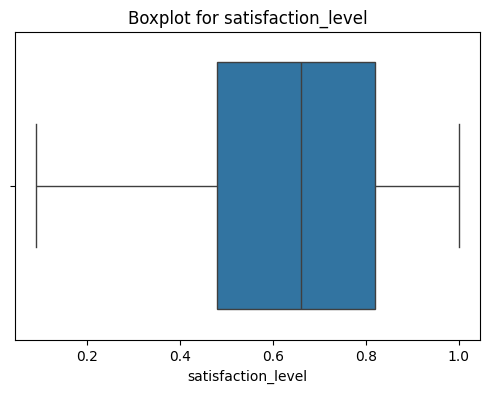

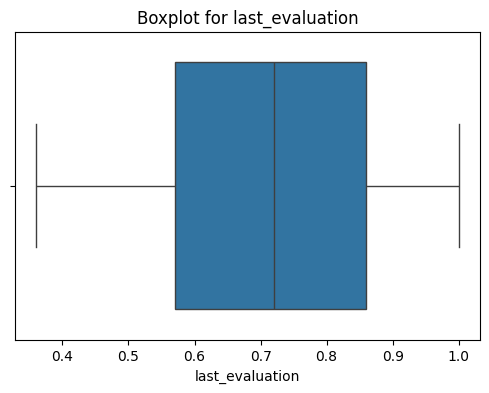

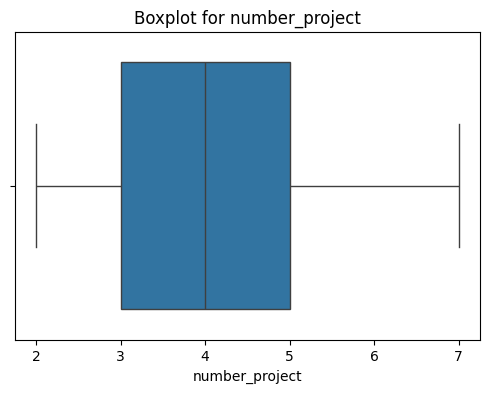

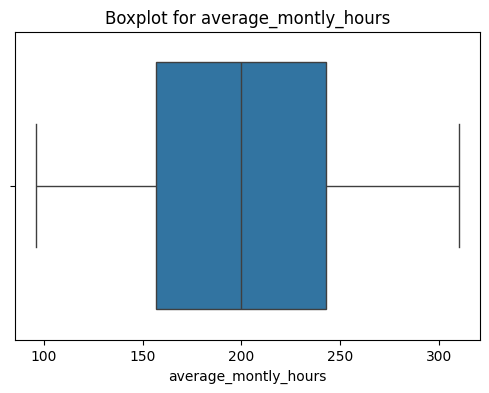

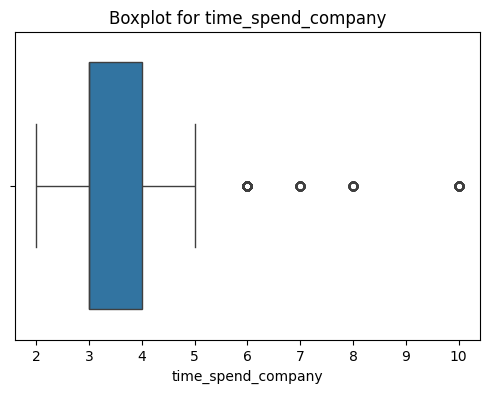

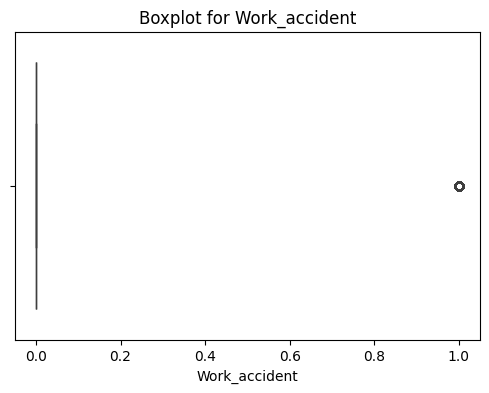

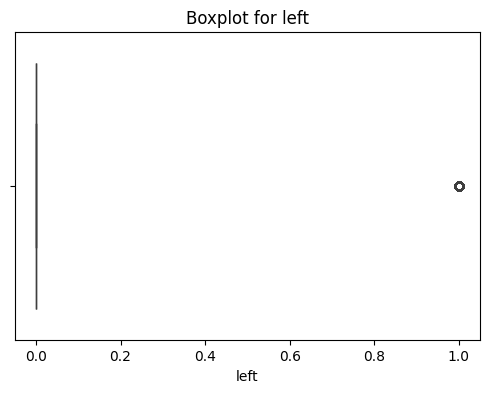

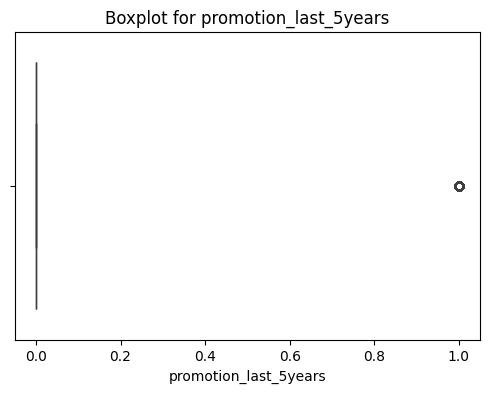

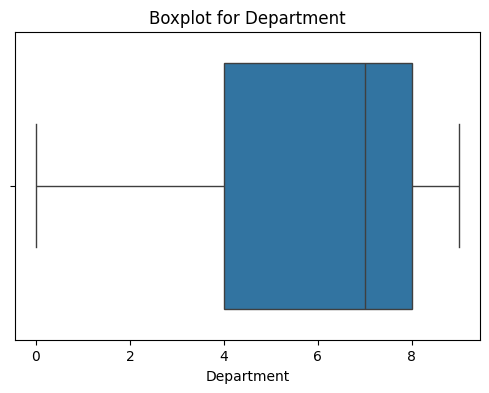

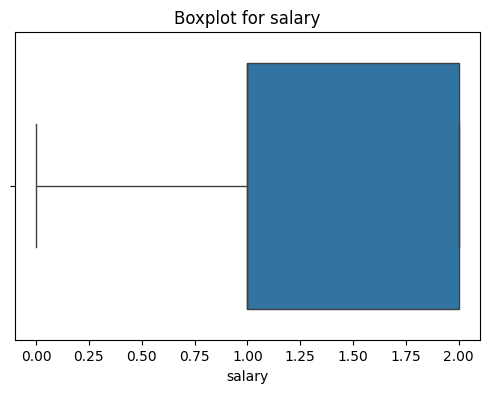

In [33]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [34]:
def handle_outliers_clip(data):
    for col in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)    
    return data

data_no_outliers_clip = handle_outliers_clip(data)
print(data_no_outliers_clip.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  Department  \
0                 3.0              0     0                      0           7   
1                 5.5              0     0                      0           7   
2                 4.0              0     0                      0           7   
3                 5.0              0     0                      0           7   
4                 3.0              0     0                      0           7   

   salary  
0       1  
1       

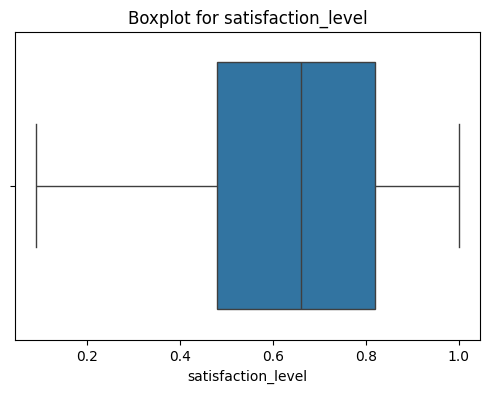

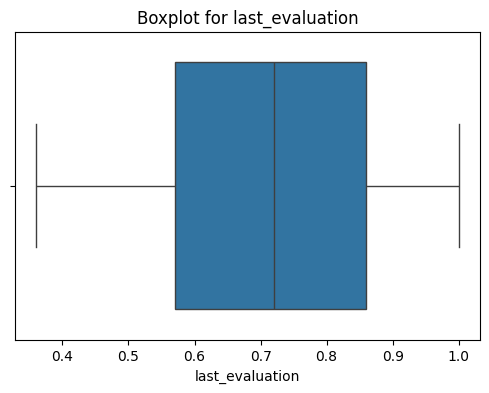

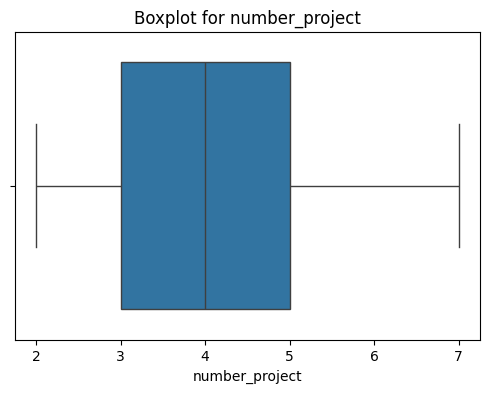

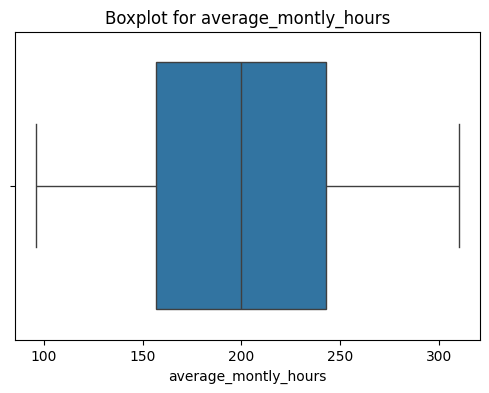

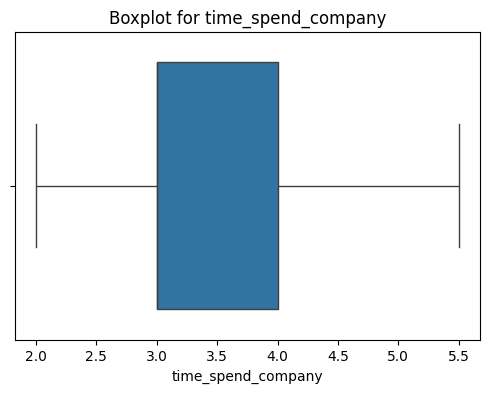

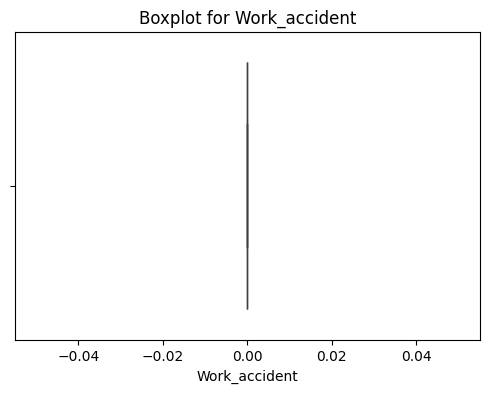

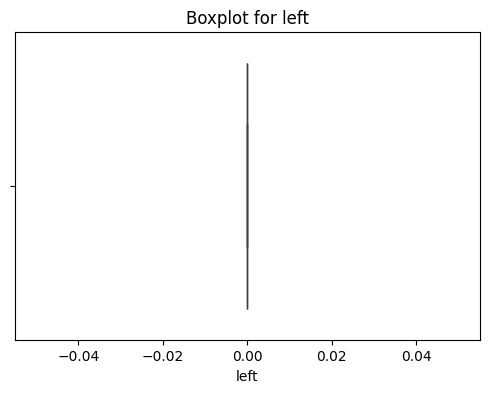

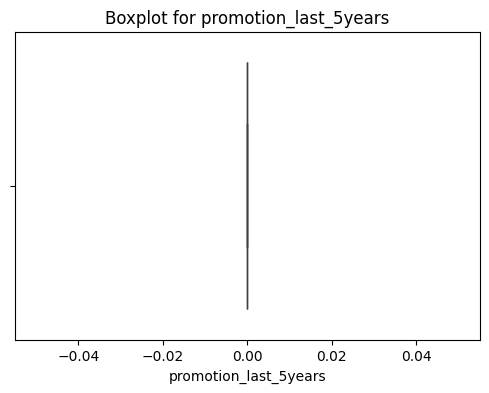

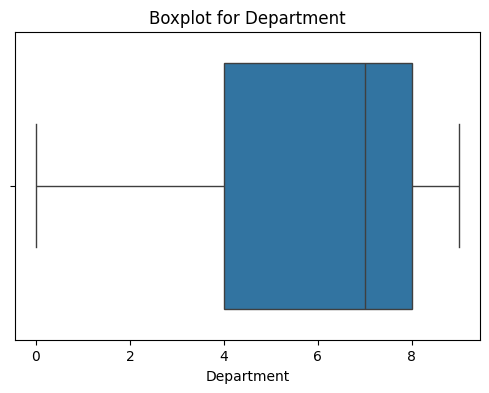

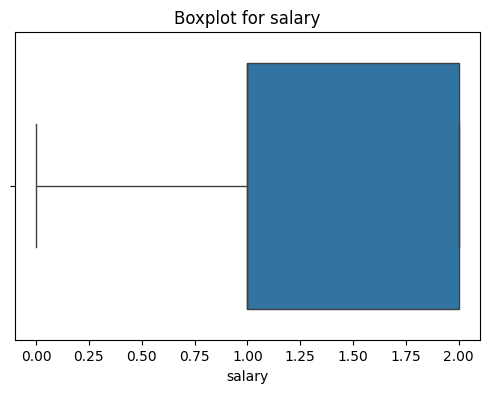

In [35]:
# checking if outliers still exist
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

### EDA

In [36]:
data.left.unique()

array([0])

In [37]:
data.left.nunique()

1

### Data Splitting

In [38]:
X = data.drop("satisfaction_level", axis=1)  
y = data["satisfaction_level"] 

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Modeling

In [41]:
regressors = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=47, random_state=34),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42, max_depth=5),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='linear')
}

for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} R^2 Score: {r2:.2f}\n')
    # Accuracy on train data
    train_score = reg.score(X_train, y_train)
    # Accuracy on test data
    test_score = reg.score(X_test, y_test)
    print(f'{name} - Train Accuracy: {train_score:.2f}, Test Accuracy: {test_score:.2f}')

Linear Regression R^2 Score: 0.06

Linear Regression - Train Accuracy: 0.07, Test Accuracy: 0.06
Random Forest Regressor R^2 Score: 0.33

Random Forest Regressor - Train Accuracy: 0.90, Test Accuracy: 0.33
Decision Tree Regressor R^2 Score: 0.36

Decision Tree Regressor - Train Accuracy: 0.37, Test Accuracy: 0.36
KNN Regressor R^2 Score: 0.26

KNN Regressor - Train Accuracy: 0.50, Test Accuracy: 0.26
SVR R^2 Score: 0.02

SVR - Train Accuracy: 0.01, Test Accuracy: 0.02


In [45]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.03845285073063012
R2 Score: 0.32435080289671736


In [49]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Lasso Regression (L1 Regularization)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
print("\nLasso Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, lasso_y_pred))
print("R2 Score:", r2_score(y_test, lasso_y_pred))

# Ridge Regression (L2 Regularization)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
print("\nRidge Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, ridge_y_pred))
print("R2 Score:", r2_score(y_test, ridge_y_pred))

# Polynomial Regression (Degree 2 for simplicity)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_y_pred = poly_model.predict(X_test_poly)
print("\nPolynomial Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, poly_y_pred))
print("R2 Score:", r2_score(y_test, poly_y_pred))


Lasso Regression Results:
Mean Squared Error: 0.05698504025506778
R2 Score: -0.0012754831871437666

Ridge Regression Results:
Mean Squared Error: 0.05322695634651823
R2 Score: 0.06475723811212986

Polynomial Regression Results:
Mean Squared Error: 0.03992317024294665
R2 Score: 0.29851604216750494


In [48]:
# END